In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import evalml
plt.style.use('ggplot')

In [2]:
data = pd.read_pickle('base_treinamento_testes.pkl')
data.head()

,codigo_vaga,ultimo_salario_candidato,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga,aprovado_vaga
4146,-5433147389500583028,0.0,INDUSTRIAL TRAINEE,ENGENHARIA QUIMICA,JUNIOR/TRAINEE,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SALVADOR,2.0,1.0,6.450,0.000,6.25,7.00,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4147,-5433147389500583028,1500.0,DESENVOLVIMENTO ENGENHEIRO PRO,ADMINISTRACAO DE EMPRESAS,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,4.0,1.0,8.000,0.000,7.99,8.20,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4148,-5433147389500583028,2050.0,CLIENTE ESTAGIO QUALIDADE,ENGENHARIA DE PRODUCAO,ESTAGIO,FORMACAO SUPERIOR COMPLETA,ARUJA,2.0,0.0,3.875,0.000,5.33,5.40,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4149,-5433147389500583028,0.0,CONTA EXECUTIVO PARCERIA,MARKETING,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,3.0,0.0,7.250,0.000,7.99,6.25,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4150,-5433147389500583028,1890.0,CICLO PDCA,MARKETING,AUXILIAR/OPERACIONAL,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SAO PAULO,3.0,4.0,5.250,6.375,6.65,7.00,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0


In [42]:
treino = pd.read_pickle('base_submission.pkl')
treino.head()

,codigo_vaga,ultimo_salario_candidato,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga
0,-5432475023076753918,9100.0,GLOBAL TRAINEE,ENGENHARIA DE PRODUCAO,PLENO,FORMACAO SUPERIOR COMPLETA,SAO PAULO,4.0,0.0,7.00,0.00,7.335,7.0,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA
1,-5432475023076753918,7653.0,TRADE,COMPRAS,SENIOR,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,RIO DE JANEIRO,4.0,3.0,8.00,7.50,6.670,7.0,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA
2,-5432475023076753918,1978.0,CONTROLADOR PRODUCAO,ENGENHARIA MECANICA,TECNICO,FORMACAO SUPERIOR COMPLETA,CACAPAVA,3.0,0.0,4.75,6.75,7.340,7.4,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA
3,-5432475023076753918,0.0,CONSULTOR EMPRESARIAL,SUPRIMENTOS,SENIOR,FORMACAO SUPERIOR COMPLETA,CURITIBA,4.0,1.0,8.00,0.00,7.500,8.5,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA
4,-5432475023076753918,2100.0,INFORMATICA REDE TECNICO,TELECOMUNICACOES,TECNICO,FORMACAO SUPERIOR COMPLETA,FEIRA DE SANTANA,1.0,0.0,3.01,3.25,3.330,4.0,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA


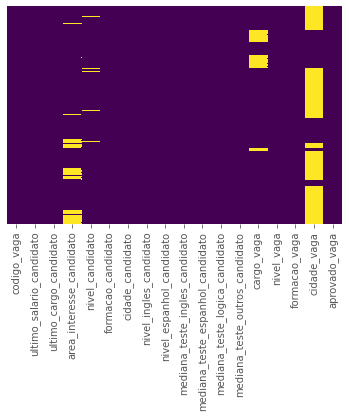

In [3]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis');

<b>Antes de começar a tratar os dados, algumas hipóteses a serem levantadas:</b>

Código de vaga é realmente uma variável importante? Se o código de cadastro é gerado aleatoriamente no sistema, qual a relação dessa variável com o candidato ser ou não aprovado? Acredito que nenhuma relação. É uma variável que pode ser excluída.

Área de interesse do candidato: Primeiramente que são muitas áreas. Transformar todas essas áreas em números, poderia distorcer o modelo. Segundo, como o próprio nome já diz, área de interesse e não necessáriamente o candidato tem alguma experiência nesse campo. Eu posso me interessar por Astronomia, mas não necessariamente tenho aptidão ou competência para essa área. É algo que está relacionado com o desejo do candidato, não necessariamente uma competência ou habilidade comprovada. Por esse motivo, é uma variável que pode ser excluída também.

Cidade do candidato e cidade vaga, ambas foram excluídas pois temos cidades de diferentes países. E isso pode afetar outras variáveis, como por exemplo, o salário. Por exemplo, temos cidades da Argentina, Colombia e Brasil, todos com moedas diferentes. Esse fator, impacta diretamente em uma das variáveis mais importantes que é o salário. 

Outras variáveis foram transformadas em dummies. 

In [4]:
data.sort_values('cidade_vaga', ascending=False, inplace=True) 
data

,codigo_vaga,ultimo_salario_candidato,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga,aprovado_vaga
47879,-8121008623955203509,2000.0,ELETRONICA EQUIPAMENTO TECNICO,MANUTENCAO INDUSTRIAL,TECNICO,FORMACAO SUPERIOR COMPLETA,UBERLANDIA,2.0,1.0,4.50,4.0,7.990,5.150,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,0
8808,3432259187290165962,3000.0,TRAINEE,MARKETING,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,3.0,1.0,6.75,0.0,4.000,7.500,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0
8800,3432259187290165962,3400.0,ASSISTENTE TECNICO,ADMINISTRACAO PUBLICA,PLENO,POS-GRADUACAO NO NIVEL MESTRADO,SAO PAULO,4.0,1.0,9.32,0.0,7.330,2.725,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0
8801,3432259187290165962,4000.0,ANALISTA METODO PROCESSO,COMPRAS,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,1.0,0.0,3.00,2.5,5.455,3.200,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0
8802,3432259187290165962,4200.0,PROJETISTA PROJETO SUPERVISOR,ENGENHARIA MECANICA,PLENO,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,UBERLANDIA,4.0,1.0,6.50,0.0,5.325,6.700,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52273,-408011488522086617,0.0,ADMINISTRATIVO EMPLEADO,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),BUENOS AIRES,0.0,0.0,0.00,0.0,0.000,9.200,TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
52274,-408011488522086617,0.0,NAO CLASSIFICADO,None,None,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,BOGOTA,0.0,0.0,0.00,0.0,0.000,6.600,TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
52275,-408011488522086617,1300.0,ESTAGIO MANUTENCAO,ENGENHARIA - OUTRAS,ESTAGIO,FORMACAO SUPERIOR COMPLETA,SALVADOR,4.0,0.0,9.75,0.0,7.675,8.200,TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
52276,-408011488522086617,0.0,COMERCIAL EXECUTIVO,None,AUXILIAR/OPERACIONAL,FORMACAO SUPERIOR (CURSANDO),ZARATE,0.0,0.0,0.00,0.0,0.000,6.500,TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0


In [5]:
duplicados = data[data.duplicated(keep='first')]
print(duplicados)


               codigo_vaga  ultimo_salario_candidato ultimo_cargo_candidato  \
39245  8670946023719118796                       0.0       NAO CLASSIFICADO   
39275  8670946023719118796                       0.0       NAO CLASSIFICADO   
39351  8670946023719118796                       0.0       NAO CLASSIFICADO   
39472  8670946023719118796                       0.0       NAO CLASSIFICADO   
39507  8670946023719118796                       0.0       NAO CLASSIFICADO   
...                    ...                       ...                    ...   
51664 -1872122770023579723                       0.0               ANALISTA   
51671 -1872122770023579723                       0.0       NAO CLASSIFICADO   
51707 -1872122770023579723                       0.0   ANALISTA PRODUCT SSR   
51956 -2894132490890953032                       0.0                PASANTE   
51965 -2894132490890953032                       0.0                PASANTE   

      area_interesse_candidato nivel_candidato     

In [6]:
data.drop_duplicates(keep='first', inplace=True) 

In [7]:
data.drop(data[data.cidade_vaga=='GUADALAJARA'].index, inplace=True)

In [8]:
data.drop(data[data.cidade_candidato=='BUENOS AIRES'].index, inplace=True)

In [10]:
data

,codigo_vaga,ultimo_salario_candidato,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga,aprovado_vaga
47879,-8121008623955203509,2000.0,ELETRONICA EQUIPAMENTO TECNICO,MANUTENCAO INDUSTRIAL,TECNICO,FORMACAO SUPERIOR COMPLETA,UBERLANDIA,2.0,1.0,4.50,4.0,7.990,5.150,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,0
8808,3432259187290165962,3000.0,TRAINEE,MARKETING,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,3.0,1.0,6.75,0.0,4.000,7.500,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0
8800,3432259187290165962,3400.0,ASSISTENTE TECNICO,ADMINISTRACAO PUBLICA,PLENO,POS-GRADUACAO NO NIVEL MESTRADO,SAO PAULO,4.0,1.0,9.32,0.0,7.330,2.725,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0
8801,3432259187290165962,4000.0,ANALISTA METODO PROCESSO,COMPRAS,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,1.0,0.0,3.00,2.5,5.455,3.200,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0
8802,3432259187290165962,4200.0,PROJETISTA PROJETO SUPERVISOR,ENGENHARIA MECANICA,PLENO,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,UBERLANDIA,4.0,1.0,6.50,0.0,5.325,6.700,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52270,-408011488522086617,0.0,ADMINISTRATIVO COMMUNITY MANAG,None,PLENO,FORMACAO SUPERIOR (CURSANDO),MUNIZ,0.0,0.0,0.00,0.0,0.000,6.700,TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
52272,-408011488522086617,0.0,INSTRUTOR,None,PLENO,FORMACAO SUPERIOR COMPLETA,CAMPANA,0.0,0.0,0.00,0.0,0.000,6.000,TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
52274,-408011488522086617,0.0,NAO CLASSIFICADO,None,None,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,BOGOTA,0.0,0.0,0.00,0.0,0.000,6.600,TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
52275,-408011488522086617,1300.0,ESTAGIO MANUTENCAO,ENGENHARIA - OUTRAS,ESTAGIO,FORMACAO SUPERIOR COMPLETA,SALVADOR,4.0,0.0,9.75,0.0,7.675,8.200,TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0


In [11]:
del data['codigo_vaga']
del data['area_interesse_candidato']
del data['cidade_vaga']
del data['cidade_candidato']


## Tratamento dos valores faltantes

Algumas variáveis possuem muitos dados faltantes. A varivável cidade_vaga será excluída do modelo, pois 0,06669 das vagas não possuem a cidade listada. Ou seja 2/3 desses dados não estão contidos. São muitos dados para "preencher", e isso poderá enviessar o nosso modelo. 


In [ ]:
data.isnull().sum()

In [ ]:
data['cidade_candidato'].replace(['None'], np.nan)

data['cidade_candidato'].fillna('SAO PAULO', inplace=True)

In [ ]:
#Vamos dar um replace aonde está None, para São Paulo. 
data['cidade_vaga'].unique()

data = data.replace(['None'], np.nan)

data['cidade_vaga'].fillna('SAO PAULO', inplace=True)

In [12]:
#Foi deletada essa coluna pois tinha apenas uma série de dados
del data['nivel_vaga']

In [13]:
data['nivel_candidato'].value_counts()

JUNIOR/TRAINEE            6396
ESTAGIO                   6065
PLENO                     4369
AUXILIAR/OPERACIONAL      2468
SUPERVISAO/COORDENACAO    1938
TECNICO                    858
GERENCIA                   788
SENIOR                     773
DIRETORIA                  293
Name: nivel_candidato, dtype: int64

In [14]:
nivel_candidato = {'JUNIOR/TRAINEE' : 1, 
                   'ESTAGIO' : 0,
                   'PLENO': 3, 
                   'AUXILIAR/OPERACIONAL': 2,
                   'SUPERVISAO/COORDENACAO': 5,
                   'TECNICO': 4,
                   'SENIOR': 6,
                   'GERENCIA': 7,
                   'DIRETORIA': 8} 
data.replace({'nivel_candidato': nivel_candidato
                }, inplace=True)

In [15]:
data.nivel_candidato = data.nivel_candidato.astype('float64')

In [16]:
data['nivel_candidato'].mean()

2.0903206948388173

In [17]:
data['nivel_candidato'].median()

1.0

In [18]:
data['aprovado_vaga'].value_counts()

0    22147
1     2287
Name: aprovado_vaga, dtype: int64

In [19]:
data['nivel_candidato'].fillna(data['nivel_candidato'].median(), inplace=True)

O motivo para que preenchessemos as variáveis faltantes (Nan) por estágio, por conta de que a mais de 80% das pessoas não concluíram a faculdade. Se levarmos em conta que a grande maioria não tem experiência, o estágio nesse caso é a melhor opção. 

## Transformação das variáveis categóricas em variáveis numéricas ou dummies. 

In [20]:
data['cargo_vaga'].value_counts()

PROGRAMA TRAINEE             15832
GERENTE LOJA SUPERMERCADO     1834
INTERNACIONAL TRAINEE         1677
TELECOMUNICACAO TRAINEE        988
COMERCIAL                      734
TRAINEE                        162
Name: cargo_vaga, dtype: int64

In [21]:
cargo_vaga = {'PROGRAMA TRAINEE': 0,
              'INTERNACIONAL TRAINEE': 0,
              'TELECOMUNICACAO TRAINEE': 0,
              'TRAINEE': 0, 
                'GERENTE LOJA SUPERMERCADO' : 2, 
                'COMERCIAL': 1,
                'PROGRAMMER': 2,
                'COORDENADOR PROGRAMA': 3,
                'CORPORATIVO TRAINEE': 0} 
data.replace({'cargo_vaga': cargo_vaga
                }, inplace=True)

In [22]:
data.cargo_vaga = data.cargo_vaga.astype('float64')

In [23]:
data['cargo_vaga'].mean()

0.20737739671173505

In [24]:
data['cargo_vaga'].median()

0.0

In [25]:
data['cargo_vaga'].fillna(data['cargo_vaga'].median(), inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24434 entries, 47879 to 52276
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ultimo_salario_candidato          24434 non-null  float64
 1   ultimo_cargo_candidato            24434 non-null  object 
 2   nivel_candidato                   24434 non-null  float64
 3   formacao_candidato                24434 non-null  object 
 4   nivel_ingles_candidato            24434 non-null  float64
 5   nivel_espanhol_candidato          24434 non-null  float64
 6   mediana_teste_ingles_candidato    24434 non-null  float64
 7   mediana_teste_espanhol_candidato  24434 non-null  float64
 8   mediana_teste_logica_candidato    24434 non-null  float64
 9   mediana_teste_outros_candidato    24434 non-null  float64
 10  cargo_vaga                        24434 non-null  float64
 11  formacao_vaga                     24434 non-null  object 
 12  

In [27]:
data.ultimo_cargo_candidato = data.ultimo_cargo_candidato.astype('category')
data.formacao_vaga = data.formacao_vaga.astype('category')
data.aprovado_vaga = data.aprovado_vaga.astype('int32')
data.formacao_candidato = data.formacao_candidato.astype('category')


Aplicamos essa técnica para diminuir o tamanho do arquivo. Dessa forma conseguimos economizar memória e garantir mais performance na hora de treinar o algoritmo. Em grandes quantidades de dados essa é uma técnica que pode ser utilizada. 

Primeiramente vamos transformar todas as variáveis categóricas em valores númericos (incluindo os valores faltantes). Depois iremos preencher com valores numéricos esses dados faltantes que foram transformados. 

Continuamos a transformar variáveis categóricas em numéricas

In [28]:
data['formacao_candidato'].value_counts()

FORMACAO SUPERIOR COMPLETA                             16920
POS-GRADUACAO NO NIVEL ESPECIALIZACAO                   3938
FORMACAO SUPERIOR (CURSANDO)                            2064
POS-GRADUACAO NO NIVEL MESTRADO                         1435
POS-GRADUACAO NO NIVEL DOUTORADO                          52
ENSINO MEDIO (2O. GRAU) PROFISSIONALIZANTE COMPLETO        9
ENSINO MEDIO (2O. GRAU) COMPLETO                           7
FORMACAO SUPERIOR INTERROMPIDA                             7
ENSINO FUNDAMENTAL (1O. GRAU) INTERROMPIDO                 2
Name: formacao_candidato, dtype: int64

In [29]:
formacao_candidato = {'ENSINO FUNDAMENTAL (1O. GRAU) INTERROMPIDO': 0,
              'ENSINO MEDIO (2O. GRAU) COMPLETO': 1,
              'ENSINO MEDIO (2O. GRAU) PROFISSIONALIZANTE COMPLETO': 2,
              'FORMACAO SUPERIOR INTERROMPIDA': 3, 
                'FORMACAO SUPERIOR (CURSANDO)' : 4, 
                'FORMACAO SUPERIOR COMPLETA': 5,
                'POS-GRADUACAO NO NIVEL ESPECIALIZACAO': 6,
                'POS-GRADUACAO NO NIVEL MESTRADO': 7,
                'POS-GRADUACAO NO NIVEL DOUTORADO': 8} 
data.replace({'formacao_candidato': formacao_candidato
                }, inplace=True)

In [30]:
data['formacao_vaga'].value_counts()

FORMACAO SUPERIOR (CURSANDO)    20898
FORMACAO SUPERIOR COMPLETA       3536
Name: formacao_vaga, dtype: int64

In [31]:
del data['formacao_vaga']

In [ ]:
formacao_vaga = {'FORMACAO SUPERIOR (CURSANDO)': 0,
                  'FORMACAO SUPERIOR COMPLETA': 1} 
data.replace({'formacao_vaga': formacao_vaga
                }, inplace=True)

In [32]:
data['cidade_vaga'].value_counts()

KeyError: 'cidade_vaga'

In [ ]:
data = pd.get_dummies(data, columns=['cidade_vaga'],drop_first=False)
data

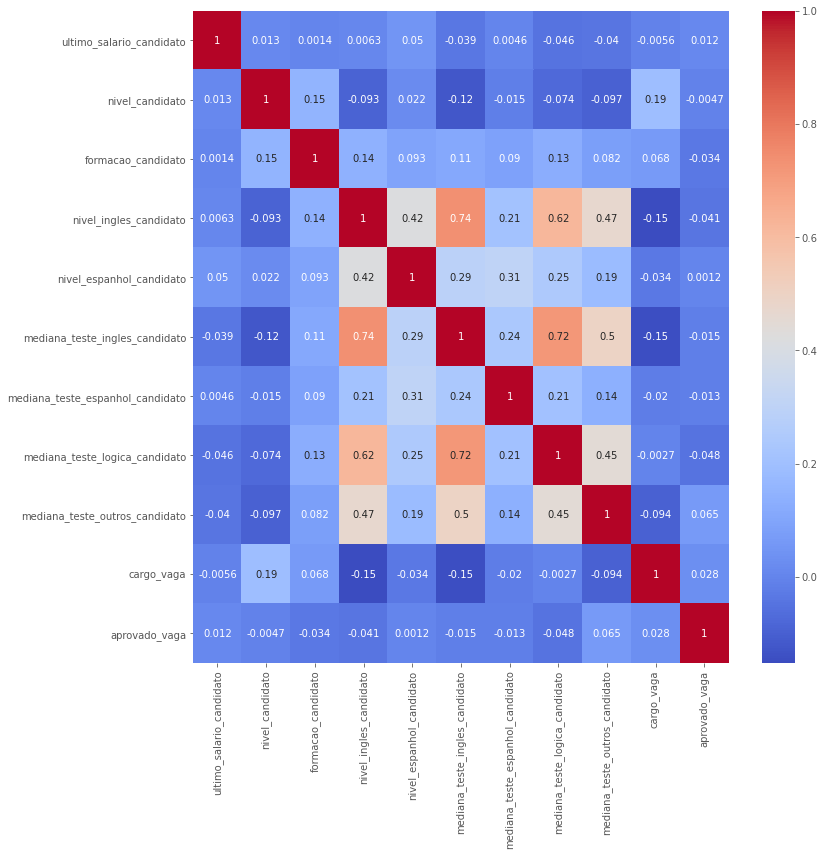

In [34]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.rcParams['figure.figsize'] = (12.0, 12.0)

Interessante notar que quem disse ter um bom nível de inglês, parece que realmente tem um bom nível de inglês tem uma facilidade para lógica. Já os candidatos que dizem saber espanhol, parece que nem todos tem um bom domínio de do idioma espanhol e tiveram resultados piores em lógica comparando com o inglês. 

Já a variável alvo que é a aprovado vaga, parece que não tem nenhuma correlação forte com nenhuma das variáveis que serão testadas. O que é bom, pois diminuí a chance de multicolinealidade nos dados. 

Outro ponto interessante, que apesar da correlação dos dados serem baixas, nivel de inglês, mediana do teste de lógica e a mediana de teste outros candidatos tem uma maior correlação (tanto positiva quanto negativa) em ser aprovado. 




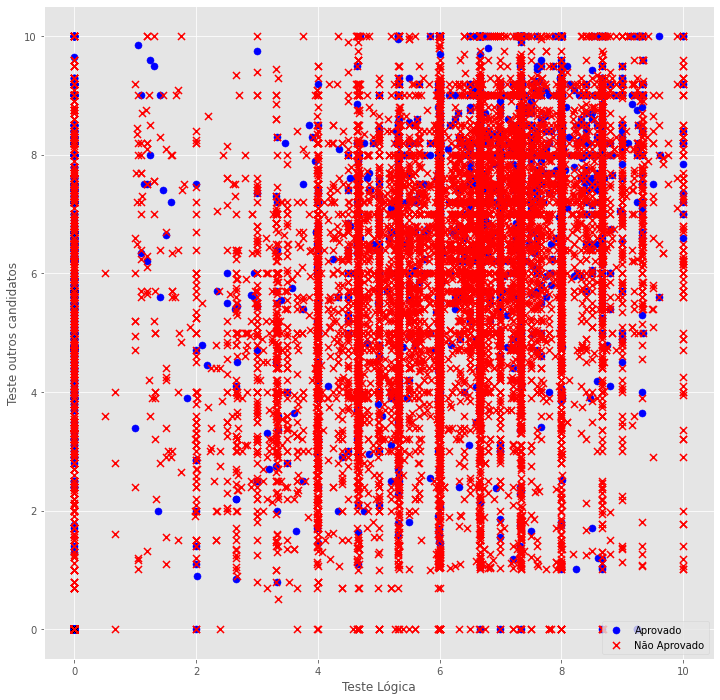

In [35]:
positive = data[data['aprovado_vaga'].isin([1])]  
negative = data[data['aprovado_vaga'].isin([0])]

fig, ax = plt.subplots(figsize=(12,12)) 
ax.scatter(positive['mediana_teste_logica_candidato'], positive['mediana_teste_outros_candidato'], s=50, c='b', marker='o', label='Aprovado')  
ax.scatter(negative['mediana_teste_logica_candidato'], negative['mediana_teste_outros_candidato'], s=50, c='r', marker='x', label='Não Aprovado')  
ax.legend()  
ax.set_xlabel('Teste Lógica')  
ax.set_ylabel('Teste outros candidatos');

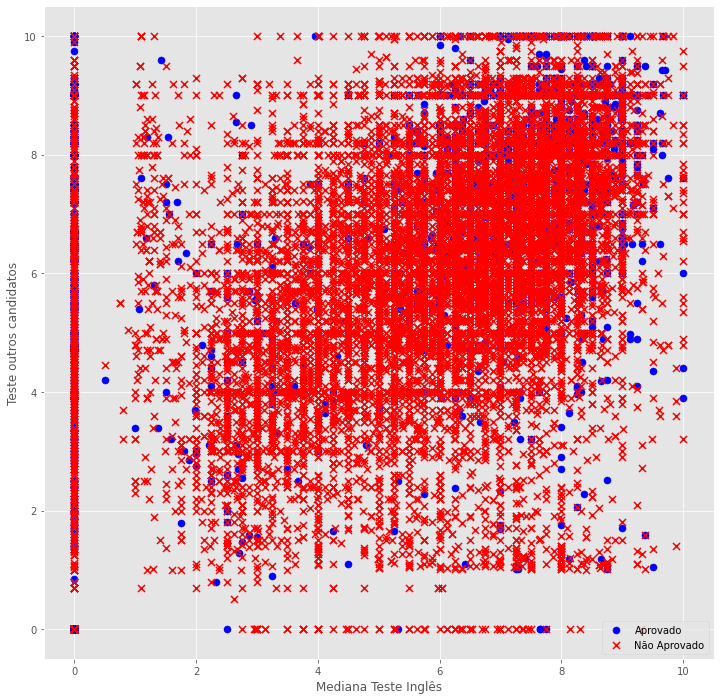

In [36]:
positive = data[data['aprovado_vaga'].isin([1])]  
negative = data[data['aprovado_vaga'].isin([0])]

fig, ax = plt.subplots(figsize=(12,12)) 
ax.scatter(positive['mediana_teste_ingles_candidato'], positive['mediana_teste_outros_candidato'], s=50, c='b', marker='o', label='Aprovado')  
ax.scatter(negative['mediana_teste_ingles_candidato'], negative['mediana_teste_outros_candidato'], s=50, c='r', marker='x', label='Não Aprovado')  
ax.legend()  
ax.set_xlabel('Mediana Teste Inglês')  
ax.set_ylabel('Teste outros candidatos');

Text(0, 0.5, 'Mediana Teste Lógica')

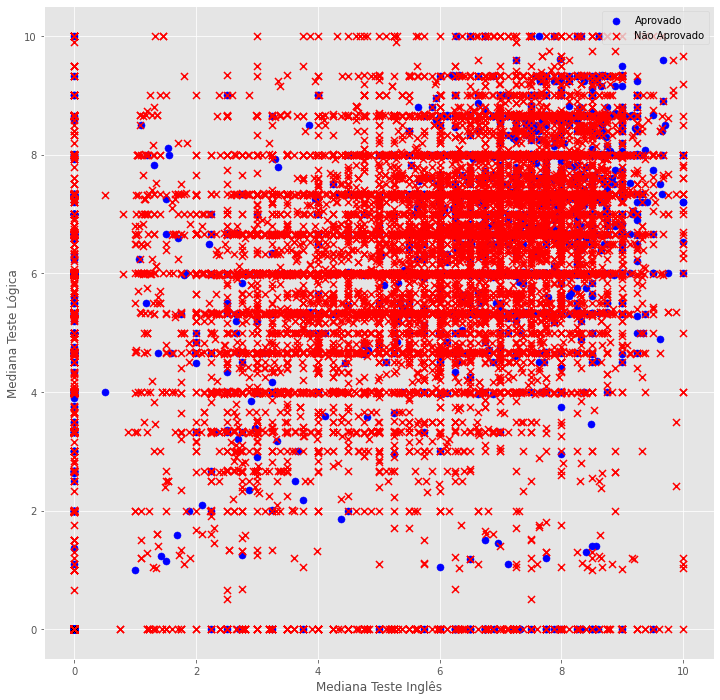

In [37]:
positive = data[data['aprovado_vaga'].isin([1])]  
negative = data[data['aprovado_vaga'].isin([0])]

fig, ax = plt.subplots(figsize=(12,12)) 
ax.scatter(positive['mediana_teste_ingles_candidato'], positive['mediana_teste_logica_candidato'], s=50, c='b', marker='o', label='Aprovado')  
ax.scatter(negative['mediana_teste_ingles_candidato'], negative['mediana_teste_logica_candidato'], s=50, c='r', marker='x', label='Não Aprovado')  
ax.legend()  
ax.set_xlabel('Mediana Teste Inglês')  
ax.set_ylabel('Mediana Teste Lógica')

Esses gráficos nos ajudam a enteder que:
    * Apesar de não termos uma regra geral, quanto maiores as notas nos testes, maiores as chances de serem aprovados. 
    * Há muitas notas altas nos dois eixos em ambos os testes que mesmo assim não foram escolhidos. Nesse caso, o currículo com a formação, ultimo emprego, ultimo salários podem estar influenciando também. 

## APLICANDO O NORMALIZER E O STANDARDSCALER

In [41]:
data.head()

,ultimo_salario_candidato,ultimo_cargo_candidato,nivel_candidato,formacao_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,aprovado_vaga
47879,2000.0,ELETRONICA EQUIPAMENTO TECNICO,4.0,5,2.0,1.0,4.50,4.0,7.990,5.150,0.0,0
8808,3000.0,TRAINEE,1.0,5,3.0,1.0,6.75,0.0,4.000,7.500,0.0,0
8800,3400.0,ASSISTENTE TECNICO,3.0,7,4.0,1.0,9.32,0.0,7.330,2.725,0.0,0
8801,4000.0,ANALISTA METODO PROCESSO,1.0,5,1.0,0.0,3.00,2.5,5.455,3.200,0.0,0
8802,4200.0,PROJETISTA PROJETO SUPERVISOR,3.0,6,4.0,1.0,6.50,0.0,5.325,6.700,0.0,0


In [43]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

# Normalizer - 
norm= Normalizer()

data[['ultimo_salario_candidato', 'nivel_candidato', 'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato', 'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato', 'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato', 'cargo_vaga']]= norm.fit_transform(data[['ultimo_salario_candidato', 'nivel_candidato', 'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato', 'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato', 'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato', 'cargo_vaga']])

scaler = StandardScaler()
data[['ultimo_salario_candidato', 'nivel_candidato', 'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato', 'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato', 'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato', 'cargo_vaga']]= scaler.fit_transform(data[['ultimo_salario_candidato', 'nivel_candidato', 'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato', 'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato', 'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato', 'cargo_vaga']])

## APLICANDO O MESMO NOS DADOS DE TREINO
# Normalizer - 
norm= Normalizer()

treino[['ultimo_salario_candidato', 'nivel_candidato', 'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato', 'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato', 'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato', 'cargo_vaga']]= norm.fit_transform(treino[['ultimo_salario_candidato', 'nivel_candidato', 'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato', 'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato', 'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato', 'cargo_vaga']])

scaler = StandardScaler()
treino[['ultimo_salario_candidato', 'nivel_candidato', 'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato', 'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato', 'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato', 'cargo_vaga']]= scaler.fit_transform(treino[['ultimo_salario_candidato', 'nivel_candidato', 'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato', 'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato', 'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato', 'cargo_vaga']])



ValueError: could not convert string to float: 'PLENO'

In [ ]:
data.head()

## TESTANDO O EVALML

In [ ]:
del data['ultimo_cargo_candidato']
del data['cidade_candidato']

In [ ]:
### Independent And Dependent Features
X=data.drop('aprovado_vaga',axis=1)
y=data['aprovado_vaga']

In [ ]:
X.head()

In [ ]:
y.value_counts(normalize=True)

In [ ]:
#### TRain And test data split
X_train,X_test,y_train,y_test=evalml.preprocessing.split_data(X,y,problem_type='binary')

In [ ]:
evalml.problem_types.ProblemTypes.all_problem_types

In [ ]:
X_train.head()

In [ ]:
from evalml import AutoMLSearch

In [ ]:
automl=AutoMLSearch(X_train=X_train,y_train=y_train,problem_type='binary',max_batches=1,optimize_thresholds=True)

In [ ]:
automl.search()

In [ ]:
automl.rankings

In [ ]:
automl.best_pipeline


In [ ]:
best_pipeline = automl.best_pipeline

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])

In [ ]:
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])

In [ ]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

In [ ]:
automl_auc.rankings

In [ ]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])

## HIPOTESES MELHORIA MODELO

- Nosso modelo, teve um desempenho muito abaixo do esperado. 

- Nossos dados estão muito desbalanceados. Teremos que aplicar duas técnicas para esse tipo de situação. Uma será gerar dados sintéticos; o principal efeito colateral é overfitting no modelo. 

- Outra solução, seria igualar a mesma quantidade da classe 1 (aprovados [0.095464] e igualar a classe 0 para cerca de 0.095464 dos dados; principal efeito colateral é a brusca redução das quantidade de variáveis para o modelo treinar. 

- Outra coisa que pode ajudar o modelo, é fazer uma normalização desses dados. 



## Criando os Modelos


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = data['aprovado_vaga']
X = data.drop('aprovado_vaga',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size=0.30)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgbm
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
pd.options.mode.chained_assignment = None
# criando dataset auxiliar
data_aux = data.tail(1000)

# eliminando valores de df_teste do dataset original
data_model = data.drop(index = data_aux.index)

# arrumando index de df_teste
data_aux.reset_index(inplace = True)
data_aux.drop('index', axis = 1, inplace = True)

In [ ]:
# obtendo o novo tamanho do dataframe
print('DataFrame principal:\n')
print('Número de quantidade de dados:\t {}'.format(data_model.shape[0]))
print('Número de variáveis/atributos:\t {}\n'.format(data_model.shape[1]))

# obtendo o tamanho do dataframe auxiliar
print('DataFrame de teste:\n')
print('Número de quantidade de dados:\t {}'.format(data_aux.shape[0]))
print('Número de variáveis/atributos:\t {}'.format(data_aux.shape[1]))

In [ ]:
SEED = 42
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print('O dataset de treino possui {} registros e o de treino {} registros.'
       .format(X_train.shape[0], X_test.shape[0]))

In [ ]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

np.random.seed(SEED)
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train,y_train)
predict = dtree.predict(X_test)
accuracy = accuracy_score(y_test, predict) * 100
print('\n')
print ("A acurácia foi de {:.2f}%.".format(accuracy))


In [ ]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
predict = model.predict(X_test)

accuracy = accuracy_score(y_test, predict) * 100
print ("A acurácia foi de {:.2f}%.".format(accuracy))

In [ ]:
X_news = data_aux.drop('aprovado_vaga', axis = 1)
y_news = data_aux['aprovado_vaga']

predict = model.predict(X_news)

accuracy = accuracy_score(y_news, predict) * 100
print ("A acurácia foi de {:.2f}%.".format(accuracy))

In [ ]:
## FIRST STEP

# divisao entre treino e teste do dataframe original
from sklearn.model_selection import train_test_split

SEED = 23
np.random.seed(SEED)

X = data.drop('aprovado_vaga', axis = 1)
y = data['aprovado_vaga']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y)

print('O dataset de treino possui {} registros e o de treino {} registros.'.format(X_train.shape[0], X_test.shape[0]))

In [ ]:
#SECOND STEP

from sklearn.model_selection import cross_val_score

SEED = 42
np.random.seed(SEED)

model = DecisionTreeClassifier(max_depth=3)
results = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')


def intervalo(results):
  mean = results.mean()
  dv = results.std()
  print('Acurácia média: {:.2f}%'.format(mean*100))
  print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

intervalo(results)

In [ ]:
from sklearn.model_selection import KFold

np.random.seed(SEED)

cv = KFold(n_splits = 5, shuffle = True)

model = DecisionTreeClassifier(max_depth=3)
results = cross_val_score(model, X_train, y_train, cv = cv)
intervalo(results)

In [ ]:
from sklearn.model_selection import StratifiedKFold

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = DecisionTreeClassifier(max_depth=3)
results = cross_val_score(model, X_train, y_train, cv = cv)
intervalo(results)

In [ ]:
max_depth = [3, 2, 4, 5, 6, 7]

for item in max_depth:
  np.random.seed(SEED)
  cv = StratifiedKFold(n_splits = 5, shuffle = True)
  model = DecisionTreeClassifier(max_depth=item)
  results = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'accuracy')
  mean = results.mean()
  dv = results.std()
  print('Acurácia média - Max Depth {}: {:.2f}%'.format(item, mean*100))
  print('Intervalo de acurácia - Max Depth {}: [{:.2f}% ~ {:.2f}%]\n'.format(item, (mean - 2*dv)*100, (mean + 2*dv)*100))

In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = DecisionTreeClassifier(max_depth=5)
model_svc = SVC()
model_log = LogisticRegression(solver='liblinear')
model_rand = RandomForestClassifier(n_estimators=100)
model_gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5)
model_light = lgbm.LGBMClassifier()
model_xgboost = XGBClassifier()


models = [model, model_svc, model_log, model_rand, model_gbc, model_light, model_xgboost]
name = ['Árvore de Decisão', 'SVC', 'Regressão Logística', 'Random Forest', 'GradientBoosting', 'Lightgbm', 'XgBoosting']

count = 0
for item in models:
  np.random.seed(SEED)
  results = cross_val_score(item, X_train, y_train, cv = cv, scoring = 'accuracy')
  mean = results.mean()
  dv = results.std()
  print('Acurácia média - Modelo {}: {:.2f}%'.format(name[count], mean*100))
  print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'.format(name[count], (mean - 2*dv)*100, (mean + 2*dv)*100))
  count += 1  


In [ ]:
## PRECISION
def intervalo_prec(results):
  mean = results.mean()
  dv = results.std()
  print('Precisão média: {:.2f}%'.format(mean*100))
  print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_light
results = cross_val_score(model_gbc, X_train, y_train, cv = cv, scoring = 'precision')
intervalo_prec(results)

In [ ]:
def intervalo_recall(results):
  mean = results.mean()
  dv = results.std()
  print('Recall médio: {:.2f}%'.format(mean*100))
  print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_light
results = cross_val_score(model_gbc, X_train, y_train, cv = cv, scoring = 'recall')
intervalo_recall(results)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_light
y_scores = cross_val_predict(model_gbc, X_train, y_train, cv = cv, method = 'decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

fig, ax = plt.subplots(figsize = (13,7))

plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.ylim([0,1])
plt.title('Precisão x Recall', fontsize = 14)

plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score

y_train_pred_recall_90 = (y_scores > -1.50)

print('Nova precisão: {:.4f}'.format(precision_score(y_train,y_train_pred_recall_90)))
print('Novo recall: {:.4f}'.format(recall_score(y_train,y_train_pred_recall_90)))
print('Novo F1 Score: {:.4f}'.format(f1_score(y_train,y_train_pred_recall_90)))

In [ ]:
%%time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_gbc
y_pred = cross_val_predict(model_gbc, X_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, ax=ax, fmt='d', cmap='Reds')

ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")

plt.tight_layout()


In [ ]:
from sklearn.metrics import classification_report

# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))

In [ ]:
%%time
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

fig, ax = plt.subplots(figsize = (12,5))

plt.plot(fpr, tpr, linewidth=2, label = 'GradientBoosting')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print('Área sob a curva ROC: {:.4f}'.format(roc_auc_score(y_train, y_scores)))

In [ ]:
np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_rf = RandomForestClassifier(n_estimators=100)
y_prob_forest = cross_val_predict(model_rf, X_train, y_train, cv = cv, method = 'predict_proba')

y_scores_forest = y_prob_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

fig, ax = plt.subplots(figsize = (12,4))

plt.plot(fpr, tpr, linewidth=2, label = 'Gradient Bossting')
plt.plot(fpr_forest, tpr_forest, linewidth=2, label = 'Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)

plt.show()

print('Área sob a curva ROC - Gradient Boosting: {:.4f}'.format(roc_auc_score(y_train, y_scores)))
print('Área sob a curva ROC - Random Forest: {:.4f}'.format(roc_auc_score(y_train, y_scores_forest)))

In [ ]:
#Lidando com classes desbalanceadas
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [ ]:
nr = NearMiss()

X, y = nr.fit_resample(X, y)

In [ ]:
ax = sns.countplot(x=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y)

In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = DecisionTreeClassifier(max_depth=5)
model_svc = SVC()
model_log = LogisticRegression(solver='liblinear')
model_rand = RandomForestClassifier(n_estimators=100)
model_gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5)
model_light = lgbm.LGBMClassifier()
model_xgboost = XGBClassifier()


models = [model, model_svc, model_log, model_rand, model_gbc, model_light, model_xgboost]
name = ['Árvore de Decisão', 'SVC', 'Regressão Logística', 'Random Forest', 'GradientBoosting', 'Lightgbm', 'XgBoosting']

count = 0
for item in models:
  np.random.seed(SEED)
  results = cross_val_score(item, X_train, y_train, cv = cv, scoring = 'accuracy')
  mean = results.mean()
  dv = results.std()
  print('Acurácia média - Modelo {}: {:.2f}%'.format(name[count], mean*100))
  print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'.format(name[count], (mean - 2*dv)*100, (mean + 2*dv)*100))
  count += 1  


In [ ]:
%%time
def intervalo_prec(results):
  mean = results.mean()
  dv = results.std()
  print('Precisão média: {:.2f}%'.format(mean*100))
  print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_rand
results = cross_val_score(model_gbc, X_train, y_train, cv = cv, scoring = 'precision')
intervalo_prec(results)

In [ ]:
%%time
def intervalo_recall(results):
  mean = results.mean()
  dv = results.std()
  print('Recall médio: {:.2f}%'.format(mean*100))
  print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_rand
results = cross_val_score(model_gbc, X_train, y_train, cv = cv, scoring = 'recall')
intervalo_recall(results)

### Trade off: Precisão ou recall

- OBS: Lembrando que na competição do Kaggle, os critérios de desempate são: F1-score e Recall. 

Com base nessa informação, o nosso trade off, sempre será visando aumentar o nosso recall. 

Porém o nosso F1 Score, é uma média harmônica entre precisão e recall. Ou seja, se eu aumentar muito o recall, a ponto de desbalancear muito as previsões, meu F1 Score irá cair muito. 

In [ ]:
%%time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_gbc
y_scores = cross_val_predict(model_gbc, X_train, y_train, cv = cv, method = 'decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

fig, ax = plt.subplots(figsize = (12,5))

plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.ylim([0,1])
plt.title('Precisão x Recall', fontsize = 14)

plt.show()


In [ ]:
y_train_pred_recall_max = (y_scores > -0.52)

print('Nova precisão: {:.4f}'.format(precision_score(y_train,y_train_pred_recall_max)))
print('Novo recall: {:.4f}'.format(recall_score(y_train,y_train_pred_recall_max)))
print('Novo F1 Score: {:.4f}'.format(f1_score(y_train,y_train_pred_recall_max)))

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = LogisticRegression(solver='liblinear')
y_pred = cross_val_predict(model, X_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, ax=ax, fmt='d', cmap='Reds')

ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")

plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report

# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))

In [ ]:
%%time
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

fig, ax = plt.subplots(figsize = (12,5))

plt.plot(fpr, tpr, linewidth=2, label = 'Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print('Área sob a curva ROC: {:.4f}'.format(roc_auc_score(y_train, y_scores)))


In [ ]:
np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5)
y_prob_forest = cross_val_predict(model_gbc, X_train, y_train, cv = cv, method = 'predict_proba')

y_scores_forest = y_prob_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

fig, ax = plt.subplots(figsize = (12,4))

plt.plot(fpr, tpr, linewidth=2, label = 'Random Forest')
plt.plot(fpr_forest, tpr_forest, linewidth=2, label = 'Gradient Bossting')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)

plt.show()

print('Área sob a curva ROC - Random Forest: {:.4f}'.format(roc_auc_score(y_train, y_scores)))
print('Área sob a curva ROC - Gradient Boosting: {:.4f}'.format(roc_auc_score(y_train, y_scores_forest)))

In [ ]:
np.random.seed(SEED)

modelfinal = RandomForestClassifier(n_estimators=100)
modelfinal.fit(X_train, y_train)

y_pred = modelfinal.predict(X_test)
y_prob = modelfinal.predict_proba(X_test)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
 
# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test,y_prob[:,1])))

## IMPORTAR O ARQUIVO DE SUBMISSÃO E FAZER AS PREVISÕES

In [ ]:
treino = pd.read_pickle('base_submission.pkl')
treino

In [ ]:
sns.heatmap(treino.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [ ]:
del treino['codigo_vaga']
del treino['area_interesse_candidato']

In [ ]:
duplicados = treino[treino.duplicated(keep='first')]
print(duplicados)

In [ ]:
treino.drop_duplicates(keep='first', inplace=True) 

In [ ]:
treino.drop(treino[treino.cidade_vaga=='GUADALAJARA'].index, inplace=True)

In [ ]:
treino.drop(treino[treino.cidade_candidato=='BUENOS AIRES'].index, inplace=True)

In [ ]:
treino.head()

In [ ]:
treino.isnull().sum()

In [ ]:
treino['nivel_candidato'].value_counts()

In [ ]:
nivel_candidato = {'JUNIOR/TRAINEE' : 1, 
                   'ESTAGIO' : 0,
                   'PLENO': 3, 
                   'AUXILIAR/OPERACIONAL': 2,
                   'SUPERVISAO/COORDENACAO': 5,
                   'TECNICO': 4,
                   'SENIOR': 6,
                   'GERENCIA': 7,
                   'DIRETORIA': 8} 
treino.replace({'nivel_candidato': nivel_candidato
                }, inplace=True)

treino.nivel_candidato = treino.nivel_candidato.astype('float64')

treino['nivel_candidato'].fillna(treino['nivel_candidato'].median(), inplace=True)

In [ ]:
del treino['ultimo_cargo_candidato']
del treino['cidade_candidato']

In [ ]:
treino['cargo_vaga'].value_counts()

In [ ]:
cargo_vaga = {'PROGRAMA TRAINEE': 0,
              'INTERNACIONAL TRAINEE': 0,
              'TELECOMUNICACAO TRAINEE': 0,
              'TRAINEE': 0, 
                'GERENTE LOJA SUPERMERCADO' : 2, 
                'COMERCIAL': 1,
                'PROGRAMMER': 2,
                'COORDENADOR PROGRAMA': 3,
                'CORPORATIVO TRAINEE': 0} 
treino.replace({'cargo_vaga': cargo_vaga
                }, inplace=True)

treino.cargo_vaga = treino.cargo_vaga.astype('float64')

treino['cargo_vaga'].fillna(treino['cargo_vaga'].median(), inplace=True)

In [ ]:
treino.formacao_vaga = treino.formacao_vaga.astype('category')
treino.formacao_candidato = treino.formacao_candidato.astype('category')


In [ ]:
treino['formacao_candidato'].value_counts()

In [ ]:
formacao_candidato = {'ENSINO FUNDAMENTAL (1O. GRAU) INTERROMPIDO': 0,
              'ENSINO MEDIO (2O. GRAU) COMPLETO': 1,
              'ENSINO MEDIO (2O. GRAU) PROFISSIONALIZANTE COMPLETO': 2,
              'FORMACAO SUPERIOR INTERROMPIDA': 3, 
                'FORMACAO SUPERIOR (CURSANDO)' : 4, 
                'FORMACAO SUPERIOR COMPLETA': 5,
                'POS-GRADUACAO NO NIVEL ESPECIALIZACAO': 6,
                'POS-GRADUACAO NO NIVEL MESTRADO': 7,
                'POS-GRADUACAO NO NIVEL DOUTORADO': 8} 
treino.replace({'formacao_candidato': formacao_candidato
                }, inplace=True)

In [ ]:
treino['formacao_vaga'].value_counts()

In [ ]:
formacao_vaga = {'FORMACAO SUPERIOR (CURSANDO)': 0,
                  'FORMACAO SUPERIOR COMPLETA': 1} 
treino.replace({'formacao_vaga': formacao_vaga
                }, inplace=True)

In [ ]:
treino['cidade_vaga'].value_counts()